# Final Project

##Dice in a cup
###Link to code for [Final project](https://colab.research.google.com/drive/1RhyaLSYUylzgkFcCEMO9fmvK-O1uKLcx?usp=sharing)


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!jupyter nbconvert --to pdf /content/drive/MyDrive/ColabNotebooks/Final_Project.ipynb

In [1]:
##############################################################################################
# If you're using Google Colab, uncomment this section by selecting the whole section and press
# ctrl+'/' on your and keyboard. Run it before you start programming, this will enable the nice 
# LaTeX "display()" function for you. If you're using the local Jupyter environment, leave it alone
##############################################################################################
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.1/latest.js?config=TeX-AMS_HTML"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

In [2]:
def getSE3(theta, p):
  #Function to calculate and return the 4x4 SE3 transformation matrix given the
  #angle of rotation and translation vector  
  T = sym.Matrix([[sym.cos(theta), -sym.sin(theta), 0, p[0]],
                  [sym.sin(theta),  sym.cos(theta), 0, p[1]],
                  [0, 0, 1, p[2]],
                  [0, 0, 0, 1]
                   ])
  return T

In [3]:
def hat(w):
  #Returns a 4x4 skew symmetric matrix given a vector
  w_hat = sym.Matrix([[0, -w[2], w[1]],
                      [w[2], 0, -w[0]],
                      [-w[1], w[0], 0]])
  return w_hat

In [4]:
def unhat(w_hat):
  #Given a 4x4 skew symmetric matrix, returns a 
  w = sym.Matrix([[w_hat[1, 2]],
                  [w_hat[0,2]],
                  [w_hat[1,0]]])
  return w

In [5]:
def KEmat(m, I):
  #Given the mass and 3x3 Inertia matrix, returns an Inertia Tensor of size 6x6
  T = sym.Matrix([[m, 0, 0, 0, 0, 0],
                  [0, m, 0, 0, 0, 0],
                  [0, 0, m, 0, 0, 0],
                  [0, 0, 0, I[0,0], I[0, 1], I[0, 2]],
                  [0, 0, 0, I[1, 0], I[1, 1], I[1, 2]],
                  [0, 0, 0, I[2, 0], I[2, 1], I[2, 2]]])
  return T

In [6]:
def g_inv(g):
  #Given a 4x4 transformation matrix, returns the inverse of the matrix
  p = sym.Matrix([[g[0, 3]],
                  [g[1, 3]],
                  [g[2, 3]]])
  R = sym.Matrix([[g[0, 0], g[0, 1], g[0,2]],
                  [g[1,0], g[1, 1], g[1, 2]],
                  [g[2, 0], g[2, 1], g[2, 2]]])
  pprime = -R.T*p
  inv = sym.Matrix([[R.T[0,0], R.T[0,1], R.T[0,2], pprime[0]],
                    [R.T[1, 0], R.T[1, 1], R.T[1, 2], pprime[1]],
                    [R.T[2, 0], R.T[2, 1], R.T[2, 2], pprime[2]],
                    [0, 0, 0, 1]])
  return inv

In [9]:
def V(g):
  #Given a 4x4 transformation matrix returns a 6x1 vector used to find KE
  p = sym.Matrix([[g[0, 3]],
                  [g[1, 3]],
                  [g[2, 3]]])
  R = sym.Matrix([[g[0, 0], g[0, 1], g[0,2]],
                  [g[1,0], g[1, 1], g[1, 2]],
                  [g[2, 0], g[2, 1], g[2, 2]]])
  temp = R.T * p.diff(t)
  w = unhat(R.T * R.diff(t))
  T = sym.Matrix([[temp[0]],
                  [temp[1]],
                  [temp[2]],
                  [w[0]],
                  [w[1]],
                  [w[2]]])
  return T

#Initializing variables where L is the length of the box, r is the length of the
# dice, M is the mass of each side of the box, m is the mass each side of the dice
t,L,r,m, M,g, Jb, Jd = sym.symbols(r't,L,r,m, M, g, J_b, J_d')

thetabox = sym.Function(r'\theta_box')(t)
thetadice = sym.Function(r'\theta_dice')(t)

xbox = sym.Function(r'x_box')(t)
ybox = sym.Function(r'y_box')(t)
xdice = sym.Function(r'x_dice')(t)
ydice = sym.Function(r'y_dice')(t)

q = sym.Matrix([xbox, ybox, thetabox, xdice, ydice, thetadice])

L = 4
r = 0.5
m = 5
M = 250
Jb = (4/3) * M * L**2
Jd =(4/3)* m * r**2
g = 9.8

#External forces, one to negate the gravity, the other to rotate the box/ cup
F_y = 4 * (M+m) * g
F_theta = 2 * M * g * sym.sin(sym.pi*t/4)
F= sym.Matrix([0, F_y, F_theta, 0, 0, 0])

#defining the frame of the box/ cup at the center of the box wrt world frame
g_wb = getSE3(thetabox, [xbox, ybox, 0])

#defining the frame of the dice at the center wrt world frame
g_wd= getSE3(thetadice, [xdice, ydice, 0])

print('\033[1mBox to world transform: ')
display(g_wb)
print('\033[1mDie to world transform: ')
display(g_wd)

#Box body velocity
Vbox = V(g_wb)
print('\033[1mBox Body Velocity: ')
display(Vbox)
#Die body velocity
Vdice = V(g_wd)
print('\033[1mDie Body Velocity: ')
display(Vdice)

Inertb = sym.Matrix([[0, 0, 0],
                     [0, 0, 0],
                     [0, 0, Jb]])
Inertd = sym.Matrix([[0, 0, 0],
                     [0, 0, 0],
                     [0, 0, Jd]])
#Box inertia Tensor
Ib = KEmat(4*M, Inertb)
print('\033[1mBox Inertia Tensor: ')
display(Ib)
#Die inertia Tensor
Id = KEmat(4*m, Inertd)
print('\033[1mDie Inertia Tensor: ')
display(Id)

#Calulating Kinetic energy of the system
KE = 0.5 * ((Vbox.T * Ib * Vbox) + (Vdice.T * Id * Vdice))[0]
#Calulating Potential energy of the system
V = g * (4*M * g_wb[1, 3] + 4*m * g_wd[1, 3])
Lagrangian = sym.simplify(KE - V)

#Calulating the Euler Lagrange Equations
qdot = q.diff(t)
qddot = qdot.diff(t)
L_mat = sym.Matrix([Lagrangian])
dLdq = L_mat.jacobian(q)
dLdqdot = L_mat.jacobian(qdot)

DdLdqdotdt = sym.simplify(dLdqdot.diff(t))
EL = sym.simplify(DdLdqdotdt - dLdq)
lhs = EL.T
rhs = F 
eqns = sym.Eq(lhs, rhs)
print('\n\033[1mEuler-Langrange Equations')
display(eqns)
soln = sym.solve(eqns, [qddot[0], qddot[1], qddot[2], qddot[3], qddot[4], qddot[5]], dict=True)

s = [q[0], q[1],q[2], q[3], q[4], q[5], qdot[0] , qdot[1], qdot[2], qdot[3], qddot[4], qddot[5], t]
eval = []                                        
for sol in soln:
      for v in qddot:
        #Saving the lambdifies solutions in a list
        expr = sym.simplify(sol[v])
        func = sym.lambdify(s, expr)
        eval.append(func)

Box to world transform: 


⎡cos(\theta_box(t))  -sin(\theta_box(t))  0  x_box(t)⎤
⎢                                                    ⎥
⎢sin(\theta_box(t))  cos(\theta_box(t))   0  y_box(t)⎥
⎢                                                    ⎥
⎢        0                    0           1     0    ⎥
⎢                                                    ⎥
⎣        0                    0           0     1    ⎦

Die to world transform: 


⎡cos(\theta_dice(t))  -sin(\theta_dice(t))  0  x_dice(t)⎤
⎢                                                       ⎥
⎢sin(\theta_dice(t))  cos(\theta_dice(t))   0  y_dice(t)⎥
⎢                                                       ⎥
⎢         0                    0            1      0    ⎥
⎢                                                       ⎥
⎣         0                    0            0      1    ⎦

Box Body Velocity: 


⎡                         d                                 d                 
⎢      sin(\theta_box(t))⋅──(y_box(t)) + cos(\theta_box(t))⋅──(x_box(t))      
⎢                         dt                                dt                
⎢                                                                             
⎢                          d                                 d                
⎢     - sin(\theta_box(t))⋅──(x_box(t)) + cos(\theta_box(t))⋅──(y_box(t))     
⎢                          dt                                dt               
⎢                                                                             
⎢                                      0                                      
⎢                                                                             
⎢                                      0                                      
⎢                                                                             
⎢                                      0            

Die Body Velocity: 


⎡                          d                                   d              
⎢      sin(\theta_dice(t))⋅──(y_dice(t)) + cos(\theta_dice(t))⋅──(x_dice(t))  
⎢                          dt                                  dt             
⎢                                                                             
⎢                           d                                   d             
⎢     - sin(\theta_dice(t))⋅──(x_dice(t)) + cos(\theta_dice(t))⋅──(y_dice(t)) 
⎢                           dt                                  dt            
⎢                                                                             
⎢                                        0                                    
⎢                                                                             
⎢                                        0                                    
⎢                                                                             
⎢                                        0          

Box Inertia Tensor: 


⎡1000   0     0    0  0         0        ⎤
⎢                                        ⎥
⎢ 0    1000   0    0  0         0        ⎥
⎢                                        ⎥
⎢ 0     0    1000  0  0         0        ⎥
⎢                                        ⎥
⎢ 0     0     0    0  0         0        ⎥
⎢                                        ⎥
⎢ 0     0     0    0  0         0        ⎥
⎢                                        ⎥
⎣ 0     0     0    0  0  5333.33333333333⎦

Die Inertia Tensor: 


⎡20  0   0   0  0         0        ⎤
⎢                                  ⎥
⎢0   20  0   0  0         0        ⎥
⎢                                  ⎥
⎢0   0   20  0  0         0        ⎥
⎢                                  ⎥
⎢0   0   0   0  0         0        ⎥
⎢                                  ⎥
⎢0   0   0   0  0         0        ⎥
⎢                                  ⎥
⎣0   0   0   0  0  1.66666666666667⎦


Euler-Langrange Equations


⎡                 2                  ⎤                    
⎢                d                   ⎥                    
⎢        1000.0⋅───(x_box(t))        ⎥                    
⎢                 2                  ⎥                    
⎢               dt                   ⎥                    
⎢                                    ⎥                    
⎢            2                       ⎥                    
⎢           d                        ⎥                    
⎢   1000.0⋅───(y_box(t)) + 9800.0    ⎥                    
⎢            2                       ⎥                    
⎢          dt                        ⎥                    
⎢                                    ⎥   ⎡       0       ⎤
⎢                   2                ⎥   ⎢               ⎥
⎢                  d                 ⎥   ⎢    9996.0     ⎥
⎢5333.33333333333⋅───(\theta_box(t)) ⎥   ⎢               ⎥
⎢                   2                ⎥   ⎢          ⎛π⋅t⎞⎥
⎢                 dt                 ⎥   ⎢4900.0⋅sin⎜───

In [10]:
#Initializing dummy variables
xb_dot, yb_dot, thetab_dot, xd_dot, yd_dot, thetad_dot = sym.symbols(r'\dot{x_{box}},\dot{y_{box}}, \dot{\theta_{box}}, \dot{x_{dice}}, \dot{y_{dice}}, \dot{\theta_{dice}}')
xb_min,yb_min,thetab_min, xd_min,yd_min,thetad_min= sym.symbols(r'x_box^-, y_box^-, \theta_box^-, x_dice^-, y_dice^-, \theta_dice^-')
xb_dotmin,yb_dotmin,thetab_dotmin, xd_dotmin,yd_dotmin,thetad_dotmin= sym.symbols(r'\dot{x_{box}}^-,\dot{y_{box}}^-, \dot{\theta_{box}}^-, \dot{x_{dice}}^-, \dot{y_{dice}}^-, \dot{\theta_{dice}}^-')
xb_dotplus,yb_dotplus,thetab_dotplus, xd_dotplus,yd_dotplus,thetad_dotplus= sym.symbols(r'\dot{x_{box}}^+,\dot{y_{box}}^+, \dot{\theta_{box}}^+, \dot{x_{dice}}^+, \dot{y_{dice}}^+, \dot{\theta_{dice}}^+')

subs_minus = {q[0]: xb_min, qdot[0]: xb_dotmin,
              q[1]: yb_min, qdot[1]: yb_dotmin, 
              q[2]: thetab_min, qdot[2]: thetab_dotmin, 
              q[3]: xd_min, qdot[3]: xd_dotmin,
              q[4]: yd_min,qdot[4]: yd_dotmin, 
              q[5]: thetad_min, qdot[5]: thetad_dotmin}
subs_plus = {q[0]: xb_min, qdot[0]: xb_dotplus, 
             q[1]: yb_min, qdot[1]: yb_dotplus,
             q[2]: thetab_min, qdot[2]: thetab_dotplus,
             q[3]: xd_min, qdot[3]: xd_dotplus, 
             q[4]: yd_min, qdot[4]: yd_dotplus, 
             q[5]: thetad_min, qdot[5]: thetad_dotplus}
lam = sym.symbols('\lambda')
#Defining all the impact conditions and substituting with dummy variables
phi1 = ((g_inv(g_wb) * g_wd *sym.Matrix([r/2, r/2, 0, 1]))[0] - L/2).subs(subs_minus)
phi2 = ((g_inv(g_wb) * g_wd *sym.Matrix([r/2, r/2, 0, 1]))[0] + L/2).subs(subs_minus)
phi3 = ((g_inv(g_wb) * g_wd *sym.Matrix([r/2, r/2, 0, 1]))[1] - L/2).subs(subs_minus)
phi4 = ((g_inv(g_wb) * g_wd *sym.Matrix([r/2, r/2, 0, 1]))[1] + L/2).subs(subs_minus)
phi5 = ((g_inv(g_wb) * g_wd *sym.Matrix([-r/2, r/2, 0, 1]))[0] - L/2).subs(subs_minus)
phi6 = ((g_inv(g_wb) * g_wd *sym.Matrix([-r/2, r/2, 0, 1]))[0] + L/2).subs(subs_minus)
phi7 = ((g_inv(g_wb) * g_wd *sym.Matrix([-r/2, r/2, 0, 1]))[1] - L/2).subs(subs_minus)
phi8 = ((g_inv(g_wb) * g_wd *sym.Matrix([-r/2, r/2, 0, 1]))[1] + L/2).subs(subs_minus)
phi9 = ((g_inv(g_wb) * g_wd *sym.Matrix([r/2, -r/2, 0, 1]))[0] - L/2).subs(subs_minus)
phi10 = ((g_inv(g_wb) * g_wd *sym.Matrix([r/2, -r/2, 0, 1]))[0] + L/2).subs(subs_minus)
phi11 = ((g_inv(g_wb) * g_wd *sym.Matrix([r/2, -r/2, 0, 1]))[1] - L/2).subs(subs_minus)
phi12 = ((g_inv(g_wb) * g_wd *sym.Matrix([r/2, -r/2, 0, 1]))[1] + L/2).subs(subs_minus)
phi13 = ((g_inv(g_wb) * g_wd *sym.Matrix([-r/2, -r/2, 0, 1]))[0] - L/2).subs(subs_minus)
phi14 = ((g_inv(g_wb) * g_wd *sym.Matrix([-r/2, -r/2, 0, 1]))[0] + L/2).subs(subs_minus)
phi15 = ((g_inv(g_wb) * g_wd *sym.Matrix([-r/2, -r/2, 0, 1]))[1] - L/2).subs(subs_minus)
phi16 = ((g_inv(g_wb) * g_wd *sym.Matrix([-r/2, -r/2, 0, 1]))[1] + L/2).subs(subs_minus)

q_dummy = q.subs(subs_minus)
phi = sym.Matrix([phi1, phi2, phi3, phi4, phi5, phi6, phi7, phi8, phi9, phi10, phi11, phi12, phi13, phi14, phi15, phi16])
phi_func = sym.lambdify([xb_min,yb_min,thetab_min, xd_min,yd_min,thetad_min, xb_dotmin,yb_dotmin,thetab_dotmin, xd_dotmin,yd_dotmin,thetad_dotmin], phi)

dphidq = phi.jacobian(q_dummy)
#Calculating the Hamiltonian
H = sym.simplify((dLdqdot * qdot)[0] - Lagrangian)

dLdqdot_Minus = dLdqdot.subs(subs_minus)
dLdqdot_Plus = dLdqdot.subs(subs_plus)

dphidq_Minus = dphidq.subs(subs_minus)

H_Minus = H.subs(subs_minus)
H_Plus = H.subs(subs_plus)
#Calculating impact Equation
impact_eqns = []
impact_lhs = sym.Matrix([dLdqdot_Plus[0]-dLdqdot_Minus[0],
                         dLdqdot_Plus[1]-dLdqdot_Minus[1], 
                         dLdqdot_Plus[2]-dLdqdot_Minus[2],
                         dLdqdot_Plus[3]-dLdqdot_Minus[3],
                         dLdqdot_Plus[4]-dLdqdot_Minus[4],
                         dLdqdot_Plus[5]-dLdqdot_Minus[5],
                         H_Plus-H_Minus])
for i in range(phi.shape[0]):
  impact_rhs = sym.Matrix([lam*dphidq_Minus[i, 0],
                           lam*dphidq_Minus[i, 1],
                           lam*dphidq_Minus[i, 2],
                           lam*dphidq_Minus[i, 3],
                           lam*dphidq_Minus[i, 4],
                           lam*dphidq_Minus[i, 5], 
                           0])
  impact_eqns.append(sym.Eq(impact_lhs, impact_rhs))


In [11]:
def impact_update(s, impact_eqns):
  #Given the impact equations and the values of state vector at impact, returns
  #an array of 12 impact solutions 
  subs_dict= {xb_min: s[0], yb_min: s[1], thetab_min: s[2], 
              xd_min: s[3], yd_min: s[4], thetad_min: s[5], 
              xb_dotmin: s[6], yb_dotmin: s[7], thetab_dotmin: s[8], 
              xd_dotmin: s[9], yd_dotmin: s[10], thetad_dotmin: s[11]}
  impact_eqns_subs = impact_eqns.subs(subs_dict)
  impact_sol = sym.solve(impact_eqns_subs, [xb_dotplus, yb_dotplus, thetab_dotplus, xd_dotplus, yd_dotplus, thetad_dotplus, lam], dict=True)
  if len(impact_sol) == 1:
    print('Just one solution')
  else:
    for i_sol in impact_sol:
      lam_soln = i_sol[lam]
      if abs(lam_soln) < 1e-06:
        #Not viable
        pass
      else:
        xb_dot_upd_sol = float(sym.N(i_sol[xb_dotplus]))
        yb_dot_upd_sol = float(sym.N(i_sol[yb_dotplus]))
        thetab_dot_upd_sol = float(sym.N(i_sol[thetab_dotplus]))
        xd_dot_upd_sol = float(sym.N(i_sol[xd_dotplus]))
        yd_dot_upd_sol = float(sym.N(i_sol[yd_dotplus]))
        thetad_dot_upd_sol = float(sym.N(i_sol[thetad_dotplus]))
        return np.array([s[0], s[1], s[2], s[3], s[4], s[5], xb_dot_upd_sol, yb_dot_upd_sol, thetab_dot_upd_sol, xd_dot_upd_sol, yd_dot_upd_sol, thetad_dot_upd_sol])
  

def impact_condition(s, phi_func, threshold=1e-1):
  phi_val = phi_func(*s)
  for i in range(phi_val.shape[0]):
    if phi_val[i] > -threshold and phi_val[i] < threshold:
      return True, i
  return False, None

def integrate(f, xt, t, dt):
    k1 = dt * f(xt, t)
    k2 = dt * f(xt+k1/2., t+dt/2)
    k3 = dt * f(xt+k2/2., t+dt/2)
    k4 = dt * f(xt+k3, t+dt)
    
    new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4)
    return new_xt

def simulate_with_impact(f, x0, t, tspan, dt, integrate):
  N = int((max(tspan) - min(tspan))/dt)
  x = np.copy(x0)
  tvec = np.linspace(min(tspan), max(tspan), N)
  xtraj = np.zeros((len(x0), N))
  for i in range(N):
    t += dt
    impact_flag, iteration = impact_condition(x, phi_func)
    if impact_flag is True:
      x = impact_update(x, impact_eqns[iteration])
      xtraj[:,i]=integrate(f, x, t, dt)
    else:
      xtraj[:,i] = integrate(f, x, t, dt)
    x = np.copy(xtraj[:,i])

  return xtraj

def mydyn(s, t):
  return np.array([s[6], s[7], s[8], s[9], s[10], s[11], eval[0](*s, t), eval[1](*s, t), eval[2](*s, t), eval[3](*s, t), eval[4](*s, t), eval[5](*s, t)])

init_s = np.array([0, 0, 0, 0, 0, np.pi/4, 0, 0, 0, 0, 0, 0])
t0 = 0
traj = simulate_with_impact(mydyn, init_s, t0, [0,10], 0.01, integrate)


Text(0.5, 1.0, 'Dice Trajectory')

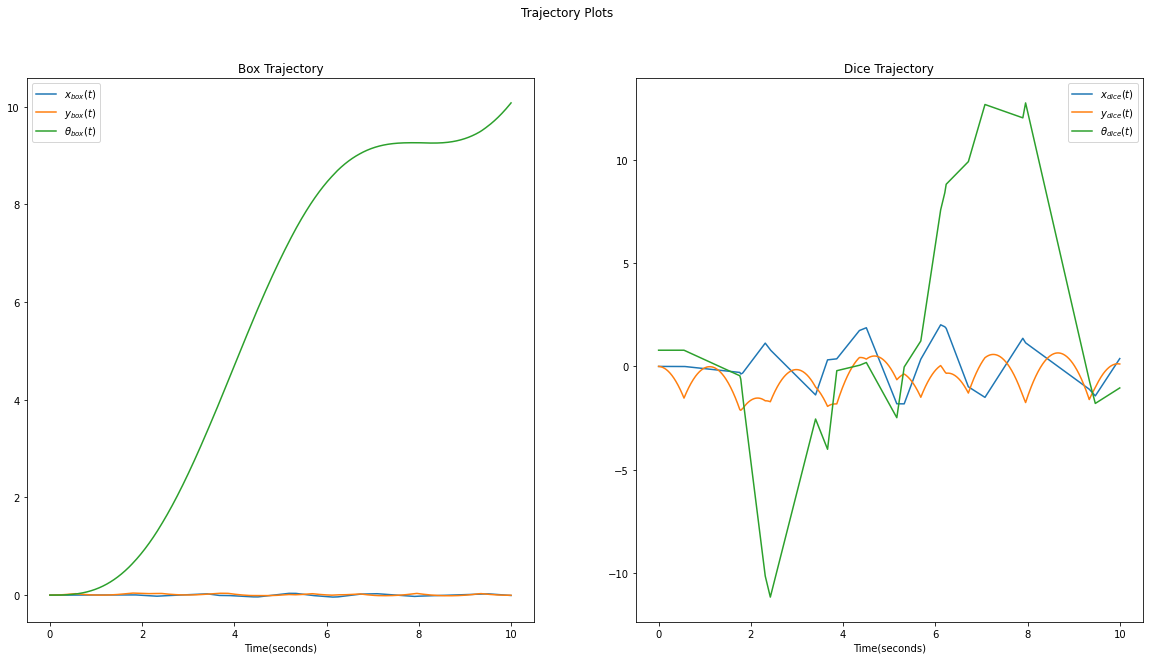

In [12]:
#Plottin the trajectories
x_list = np.linspace(0, 10, 1000)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Trajectory Plots')
ax1.plot(x_list, traj[0], label=r'$x_{box}(t)$')
ax1.plot(x_list, traj[1], label=r'$y_{box}(t)$')
ax1.plot(x_list, traj[2], label=r'$\theta_{box}(t)$')
ax1.legend(loc="best")
ax1.set_xlabel('Time(seconds)')
ax1.set_title('Box Trajectory')
ax2.plot(x_list, traj[3],label=r'$x_{dice}(t)$')
ax2.plot(x_list, traj[4],label=r'$y_{dice}(t)$')
ax2.plot(x_list, traj[5], label=r'$\theta_{dice}(t)$')
ax2.legend(loc="best")
ax2.set_xlabel('Time(seconds)')
ax2.set_title('Dice Trajectory')


In [13]:
def animate(theta_array, l_box, l_dice, T):
    #Animate function too visualize the dice in a moving cup (in 2D)
    ################################
    # Imports required for animation.
    from plotly.offline import init_notebook_mode, iplot
    from IPython.display import display, HTML
    import plotly.graph_objects as go

    #######################
    # Browser configuration.
    def configure_plotly_browser_state():
        import IPython
        display(IPython.core.display.HTML('''
            <script src="/static/components/requirejs/require.js"></script>
            <script>
              requirejs.config({
                paths: {
                  base: '/static/base',
                  plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
                },
              });
            </script>
            '''))
    configure_plotly_browser_state()
    init_notebook_mode(connected=False)
    #Initializing the state vector arrays from the given trajectory array
    x_box_array = theta_array[0]
    y_box_array = theta_array[1]
    theta_box_array = theta_array[2]
    x_dice_array = theta_array[3]
    y_dice_array = theta_array[4]
    theta_dice_array = theta_array[5]
    N = len(theta_array[0]) 

    ###############################################
    # Define arrays containing data for frame axes
    
    frame_b1_x_axis = np.zeros(N, dtype=np.float32)
    frame_b1_y_axis = np.zeros(N, dtype=np.float32)
    
    frame_b2_x_axis = np.zeros(N, dtype=np.float32)
    frame_b2_y_axis = np.zeros(N, dtype=np.float32)
    
    frame_b3_x_axis = np.zeros(N, dtype=np.float32)
    frame_b3_y_axis = np.zeros(N, dtype=np.float32)
    
    frame_b4_x_axis = np.zeros(N, dtype=np.float32)
    frame_b4_y_axis = np.zeros(N, dtype=np.float32)

    frame_d1_x_axis = np.zeros(N, dtype=np.float32)
    frame_d1_y_axis = np.zeros(N, dtype=np.float32)
    
    frame_d2_x_axis = np.zeros(N, dtype=np.float32)
    frame_d2_y_axis = np.zeros(N, dtype=np.float32)
    
    frame_d3_x_axis = np.zeros(N, dtype=np.float32)
    frame_d3_y_axis = np.zeros(N, dtype=np.float32)
    
    frame_d4_x_axis = np.zeros(N, dtype=np.float32)
    frame_d4_y_axis = np.zeros(N, dtype=np.float32)
    
    for i in range(N):
        g_wb = getSE3(theta_box_array[i], [x_box_array[i], y_box_array[i], 0])
        g_wd = getSE3(theta_dice_array[i], [x_dice_array[i], y_dice_array[i], 0])
        
        b1 = g_wb @ np.array([l_box/2, l_box/2, 0, 1])
        frame_b1_x_axis[i] = b1[0]
        frame_b1_y_axis[i] = b1[1]
        
        b2 = g_wb @ np.array([l_box/2, -l_box/2, 0, 1])
        frame_b2_x_axis[i] = b2[0]
        frame_b2_y_axis[i] = b2[1]
        
        b3 = g_wb @ np.array([-l_box/2, -l_box/2, 0, 1])
        frame_b3_x_axis[i] = b3[0]
        frame_b3_y_axis[i] = b3[1]
        
        b4 = g_wb @ np.array([-l_box/2, l_box/2, 0, 1])
        frame_b4_x_axis[i] = b4[0]
        frame_b4_y_axis[i] = b4[1]

        d1 = g_wd @ np.array([l_dice/2, l_dice/2, 0, 1])
        frame_d1_x_axis[i] = d1[0]
        frame_d1_y_axis[i] = d1[1]
        
        d2 = g_wd @ np.array([l_dice/2, -l_dice/2, 0, 1])
        frame_d2_x_axis[i] = d2[0]
        frame_d2_y_axis[i] = d2[1]
        
        d3 = g_wd @ np.array([-l_dice/2, -l_dice/2, 0, 1])
        frame_d3_x_axis[i] = d3[0]
        frame_d3_y_axis[i] = d3[1]
        
        d4 = g_wd @ np.array([-l_dice/2, l_dice/2, 0, 1])
        frame_d4_x_axis[i] = d4[0]
        frame_d4_y_axis[i] = d4[1]
        
    ####################################
    # Using these to specify axis limits.
    xm = -5 
    xM = 5 
    ym = -5 
    yM = 5 

    ###########################
    # Defining data dictionary.
    data=[
        dict(name='Box'),
        dict(name='Dice')
        ]

    ###############################
    # Preparing simulation layout.
    layout=dict(autosize=False, width=1000, height=1000,
                xaxis=dict(range=[xm, xM], autorange=False, zeroline=False,dtick=1),
                yaxis=dict(range=[ym, yM], autorange=False, zeroline=False,scaleanchor = "x",dtick=1),
                title='Dice In A Cup Simulation', 
                hovermode='closest',
                updatemenus= [{'type': 'buttons',
                               'buttons': [{'label': 'Play','method': 'animate',
                                            'args': [None, {'frame': {'duration': T, 'redraw': False}}]},
                                           {'args': [[None], {'frame': {'duration': T, 'redraw': False}, 'mode': 'immediate',
                                            'transition': {'duration': 0}}],'label': 'Pause','method': 'animate'}
                                          ]
                              }]
               )

    ########################################
    # Defining the frames of the simulation.
    frames=[dict(data=[
                      dict(x=[frame_b1_x_axis[k], frame_b2_x_axis[k], frame_b3_x_axis[k], frame_b4_x_axis[k], frame_b1_x_axis[k]], 
                           y=[frame_b1_y_axis[k], frame_b2_y_axis[k], frame_b3_y_axis[k], frame_b4_y_axis[k], frame_b1_y_axis[k]], 
                           mode='lines',
                           line=dict(color='forest green', width=3),
                           ),
                       dict(x=[frame_d1_x_axis[k], frame_d2_x_axis[k], frame_d3_x_axis[k], frame_d4_x_axis[k], frame_d1_x_axis[k]], 
                            y=[frame_d1_y_axis[k], frame_d2_y_axis[k], frame_d3_y_axis[k], frame_d4_y_axis[k], frame_d1_y_axis[k]], 
                            mode='lines',
                            line=dict(color='teal', width=3),
                            )
                      ]) for k in range(N)]

    #######################################
    # Putting it all together and plotting.
    figure1=dict(data=data, layout=layout, frames=frames)           
    iplot(figure1)


In [14]:
animate(traj,L, r,T=10)

Output hidden; open in https://colab.research.google.com to view.